In [3]:
import pandas as pd

file_path = "mental-heath-in-tech-2016_20161114.csv"
df = pd.read_csv(file_path)

#15 selected questions
selected_questions = [
    #Mental Health Status
    'Do you currently have a mental health disorder?',
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?',
    
    #Workplace Support
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
    
    #Comfort Discussing
    'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    
    #Productivity Impact
    'Do you believe your productivity is ever affected by a mental health issue?',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
    
    #Demographics
    'What is your age?',
    'What is your gender?',
    'Which of the following best describes your work position?',
    'Do you work remotely?'
]

#Create a new dataframe with just our 15 questions
focus_df = df[selected_questions].copy()

#Display 3 responses of each question
print("SAMPLE RESPONSES FOR EACH QUESTION:")
print("="*50)
for question in selected_questions:
    print(f"\n{question}:")
    print(focus_df[question].head(3).to_string())
    print("-"*50)

SAMPLE RESPONSES FOR EACH QUESTION:

Do you currently have a mental health disorder?:
0     No
1    Yes
2     No
--------------------------------------------------

Have you been diagnosed with a mental health condition by a medical professional?:
0    Yes
1    Yes
2     No
--------------------------------------------------

Have you ever sought treatment for a mental health issue from a mental health professional?:
0    0
1    1
2    1
--------------------------------------------------

Does your employer provide mental health benefits as part of healthcare coverage?:
0    Not eligible for coverage / N/A
1                                 No
2                                 No
--------------------------------------------------

Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?:
0     No
1    Yes
2     No
--------------------------------------------------

Is your anonymity protected if you choose to t

In [4]:
df['Do you currently have a mental health disorder?'].value_counts()

Do you currently have a mental health disorder?
Yes      575
No       531
Maybe    327
Name: count, dtype: int64

In [5]:
df['Have you been diagnosed with a mental health condition by a medical professional?'].value_counts()

Have you been diagnosed with a mental health condition by a medical professional?
No     717
Yes    716
Name: count, dtype: int64

In [6]:
df['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts()

Have you ever sought treatment for a mental health issue from a mental health professional?
1    839
0    594
Name: count, dtype: int64

In [7]:
df['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()


Does your employer provide mental health benefits as part of healthcare coverage?
Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: count, dtype: int64

In [8]:
#Value counts for 15 questions
questions = [
    #Mental Health Status
    'Do you currently have a mental health disorder?',
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?',
    
    #Workplace Support
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
    
    #Comfort Discussing
    'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    
    #Productivity Impact
    'Do you believe your productivity is ever affected by a mental health issue?',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
    
    #Demographics
    'What is your age?',
    'What is your gender?',
    'Which of the following best describes your work position?',
    'Do you work remotely?'
]

for q in questions:
 
    print(df[q].value_counts(dropna=False))
    print("-"*50)

Do you currently have a mental health disorder?
Yes      575
No       531
Maybe    327
Name: count, dtype: int64
--------------------------------------------------
Have you been diagnosed with a mental health condition by a medical professional?
No     717
Yes    716
Name: count, dtype: int64
--------------------------------------------------
Have you ever sought treatment for a mental health issue from a mental health professional?
1    839
0    594
Name: count, dtype: int64
--------------------------------------------------
Does your employer provide mental health benefits as part of healthcare coverage?
Yes                                531
I don't know                       319
NaN                                287
No                                 213
Not eligible for coverage / N/A     83
Name: count, dtype: int64
--------------------------------------------------
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other offi

In [9]:
#Gender answers
df['What is your gender?'].value_counts()

What is your gender?
Male           610
male           249
Female         153
female          95
M               86
              ... 
cis male         1
Human            1
Genderfluid      1
Enby             1
MALE             1
Name: count, Length: 70, dtype: int64

In [10]:
#Gender clean up
import pandas as pd
import numpy as np

#Preserve original data
df['gender_raw'] = df['What is your gender?'].copy()

#Standardize 
df['gender_clean'] = df['What is your gender?'].str.lower().str.strip()

#Handle Special Cases 
special_cases = {        
    'i identify as female.': 'Female',
    'female assigned at birth': 'Female',
    'female or multi-gender femme': 'Female',
    'female-bodied; no feelings about gender': 'Female',
    'male/genderqueer': 'Genderqueer',  
    'genderqueer woman': 'Genderqueer',  
    'other/transfeminine': 'Transgender',
    "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?": "Male"
}

for original, new_category in special_cases.items():
    df.loc[df['gender_clean'] == original, 'gender_clean'] = new_category

#Create Mapping Dictionary with Separate Categories
gender_mapping = {
    # Male variants
    r'^m$|^male$|^man$|^m\|$|^dude$|^mail$|^malr$|^cisdude$|^cis male$|^male\.$|^male \(cis\)$|^sex is male$': 'Male',
    
    # Female variants
    r'^f$|^female$|^woman$|^fem$|^cis woman$|^cis female$|^female\.$|^cisgender female$': 'Female',
    
    # Transgender variants
    r'^male \(trans, ftm\)$|^ftm$|^mtf$|^transgender woman$|^m2f$|^transitioned, m2f$': 'Transgender',
    
    # Non-binary variants (separate from Genderqueer)
    r'^non.?binary$|^nonbinary$|^enby$|^nb masculine$': 'Non-binary',
    
    # Genderqueer variants (separate from Non-binary)
    r'^genderqueer$|^queer$': 'Genderqueer',
    
    # Genderfluid (could be separate or grouped - here kept with Genderqueer)
    r'^genderfluid$': 'Genderfluid',
    
    # Other identities
    r'^agender$|^bigender$|^androgynous$|^unicorn$|^genderflux demi-girl$|^afab$|^other$|^human$': 'Other'
}

#Apply the Mapping
for pattern, category in gender_mapping.items():
    df.loc[df['gender_clean'].str.contains(pattern, regex=True, na=False), 'gender_clean'] = category

#Final Cleanup
df['gender_clean'] = df['gender_clean'].str.capitalize()

# Convert remaining unmatched responses to 'Other'
df.loc[~df['gender_clean'].isin(['Male', 'Female', 'Transgender', 'Non-binary', 'Genderqueer', 'Genderfluid', 'Other']), 
     'gender_clean'] = 'Other'

#Verify Results
# Show value counts before and after cleaning
print("Original Gender Responses:")
print(df['What is your gender?'].value_counts().head(10))
print("\nCleaned Gender Categories:")
print(df['gender_clean'].value_counts(dropna=False))

# Show samples of cleaned data
print("\nSample of Cleaned Data:")
print(df[['What is your gender?', 'gender_clean']].sample(10))

print("\nNon-binary/Genderqueer breakdown:")
print(df[df['gender_clean'].isin(['Non-binary', 'Genderqueer', 'Genderfluid'])]['gender_raw'].value_counts())



Original Gender Responses:
What is your gender?
Male       610
male       249
Female     153
female      95
M           86
m           79
F           38
f           23
Male        11
Female       9
Name: count, dtype: int64

Cleaned Gender Categories:
gender_clean
Male           1056
Female          336
Other            22
Non-binary        8
Transgender       5
Genderqueer       5
Genderfluid       1
Name: count, dtype: int64

Sample of Cleaned Data:
     What is your gender? gender_clean
714                  male         Male
434                  Male         Male
872                     M         Male
220                 Male          Male
923                     M         Male
57                   Male         Male
561           genderqueer  Genderqueer
881                  male         Male
1139                 Male         Male
565                  male         Male

Non-binary/Genderqueer breakdown:
gender_raw
non-binary           4
Nonbinary            2
nb masculine         1


In [11]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)    
df.head(1)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

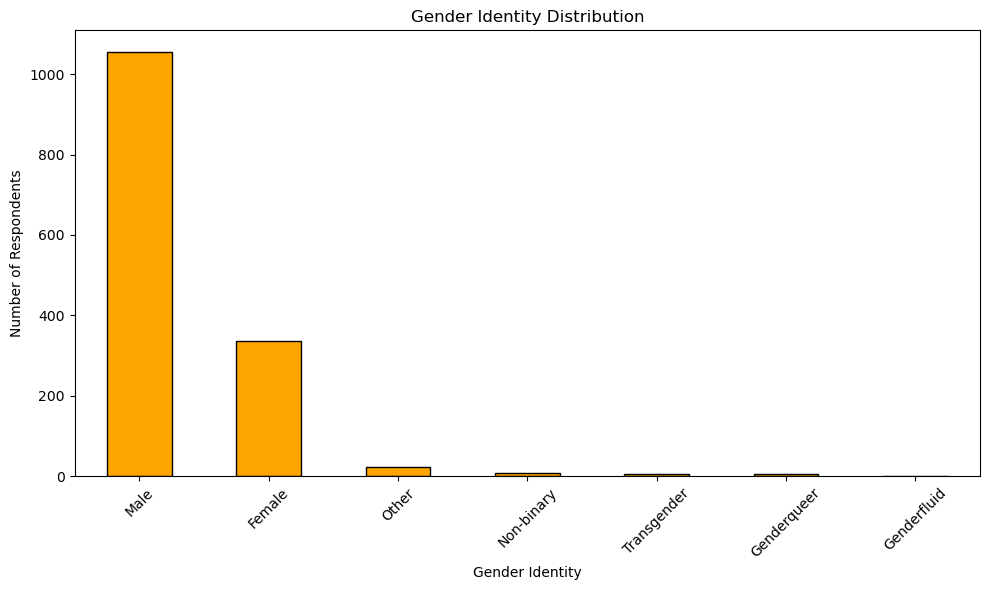

In [12]:
import matplotlib.pyplot as plt

#Gender bar graph
gender_counts = df['gender_clean'].value_counts()

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Gender Identity Distribution')
plt.xlabel('Gender Identity')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('gender_ID.png', dpi=300, bbox_inches='tight')
plt.show()

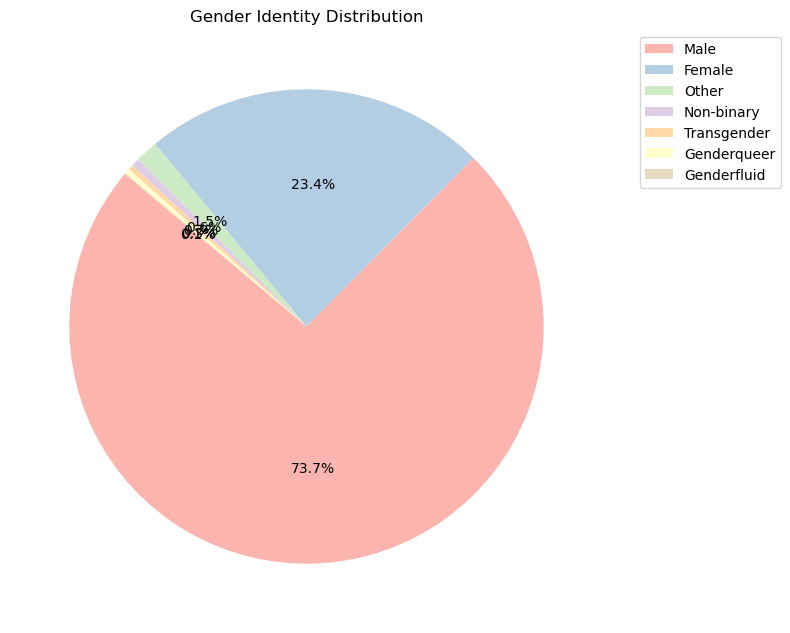

In [13]:
plt.figure(figsize=(8, 8))
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors,
    labels=None  
)
plt.legend(labels=gender_counts.index, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Gender Identity Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


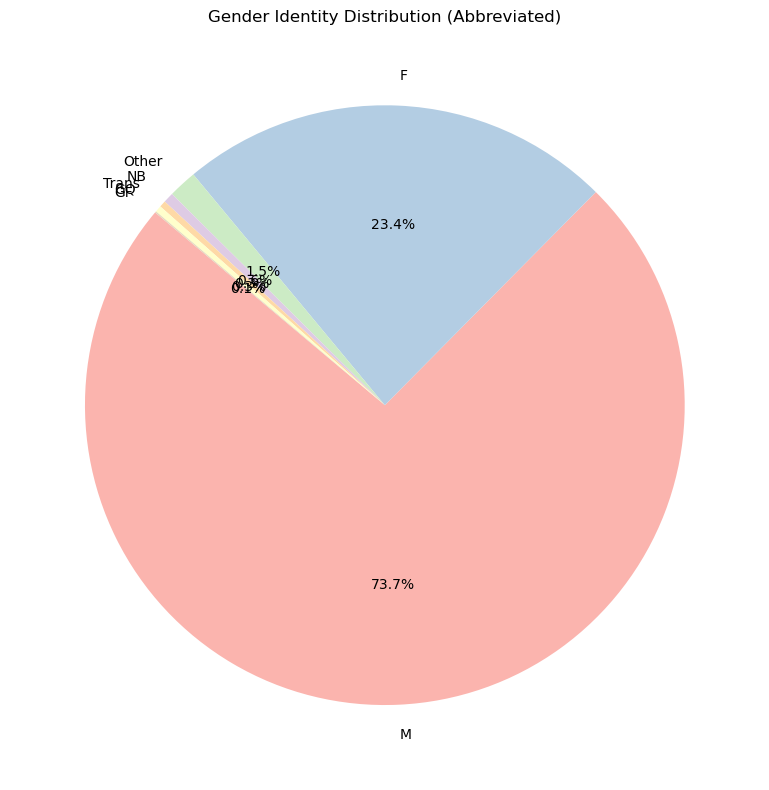

In [14]:
short_labels = {
    'Male': 'M',
    'Female': 'F',
    'Other': 'Other',
    'Non-binary': 'NB',
    'Transgender': 'Trans',
    'Genderqueer': 'GQ',
    'Genderfluid': 'GF'
}

#short labels
short_gender_counts = gender_counts.rename(index=short_labels)

plt.figure(figsize=(8, 8))
short_gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Gender Identity Distribution (Abbreviated)')
plt.ylabel('')
plt.tight_layout()
plt.show()



In [15]:
df['What is your gender?'].value_counts()

What is your gender?
Male           610
male           249
Female         153
female          95
M               86
              ... 
cis male         1
Human            1
Genderfluid      1
Enby             1
MALE             1
Name: count, Length: 70, dtype: int64

In [16]:
#adding "not answered" cattegory

import pandas as pd
import matplotlib.pyplot as plt

#original column
df['gender_raw'] = df['What is your gender?'].copy()

#Handling NaN
df['gender_clean'] = df['What is your gender?'].astype(str).str.lower().str.strip()

#Special cases 
special_cases = {        
    'i identify as female.': 'Female',
    'female assigned at birth': 'Female',
    'female or multi-gender femme': 'Female',
    'female-bodied; no feelings about gender': 'Female',
    'male/genderqueer': 'Genderqueer',  
    'genderqueer woman': 'Genderqueer',  
    'other/transfeminine': 'Transgender',
    "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?": "Male"
}


for original, new in special_cases.items():
    df.loc[df['gender_clean'] == original, 'gender_clean'] = new

#Mapping of variants
import re

gender_mapping = {
    r'^m$|^male$|^man$|^m\|$|^dude$|^mail$|^malr$|^cisdude$|^cis male$|^male\.$|^male \(cis\)$|^sex is male$': 'Male',
    r'^f$|^female$|^woman$|^fem$|^cis woman$|^cis female$|^female\.$|^cisgender female$': 'Female',
    r'^male \(trans, ftm\)$|^ftm$|^mtf$|^transgender woman$|^m2f$|^transitioned, m2f$': 'Transgender',
    r'^non.?binary$|^nonbinary$|^enby$|^nb masculine$': 'Non-binary',
    r'^genderqueer$|^queer$': 'Genderqueer',
    r'^genderfluid$': 'Genderfluid',
    r'^agender$|^bigender$|^androgynous$|^unicorn$|^genderflux demi-girl$|^afab$|^other$|^human$': 'Other'
}

for pattern, category in gender_mapping.items():
    df.loc[df['gender_clean'].str.contains(pattern, regex=True, na=False), 'gender_clean'] = category

#Capitalize
df['gender_clean'] = df['gender_clean'].str.capitalize()

#'Not Answered'
df.loc[df['gender_raw'].isna() | df['gender_raw'].str.strip().eq(''), 'gender_clean'] = 'Not Answered'

#Unclassified as 'Other'
valid_categories = ['Male', 'Female', 'Transgender', 'Non-binary', 'Genderqueer', 'Genderfluid', 'Other', 'Not Answered']
df.loc[~df['gender_clean'].isin(valid_categories), 'gender_clean'] = 'Other'

# Step 8: View cleaned counts
print("\nCleaned Gender Counts:")
print(df['gender_clean'].value_counts(dropna=False))





Cleaned Gender Counts:
gender_clean
Male            1056
Female           336
Other             19
Non-binary         8
Transgender        5
Genderqueer        5
Not Answered       3
Genderfluid        1
Name: count, dtype: int64


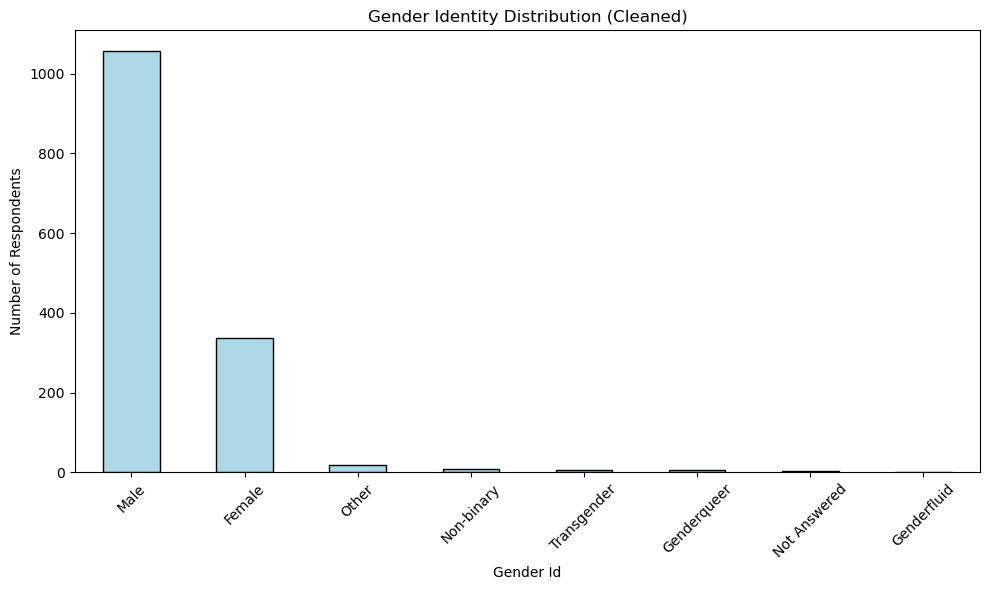

In [17]:
#Bar plot
plt.figure(figsize=(10, 6))
df['gender_clean'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Gender Identity Distribution (Cleaned)')
plt.xlabel('Gender Id')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


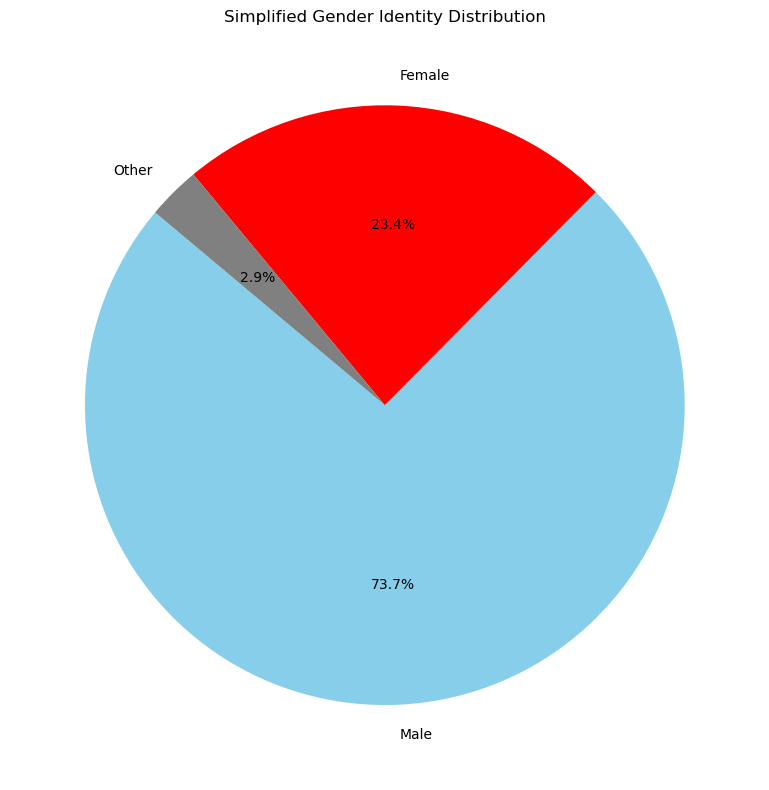

In [18]:
#plot pie chart with only 3 categories: Male, Female and Other
#Grouped other categories
df['gender_grouped'] = df['gender_clean'].replace({
    'Non-binary': 'Other',
    'Transgender': 'Other',
    'Genderqueer': 'Other',
    'Genderfluid': 'Other',
    'Other': 'Other',
    'Not Answered': 'Other'
})

#Count values
grouped_counts = df['gender_grouped'].value_counts()

#Plot pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
colors = ['skyblue', 'red', 'gray']
grouped_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    labels=grouped_counts.index,
    ylabel=''
)
plt.title('Simplified Gender Identity Distribution')
plt.tight_layout()
plt.savefig('gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

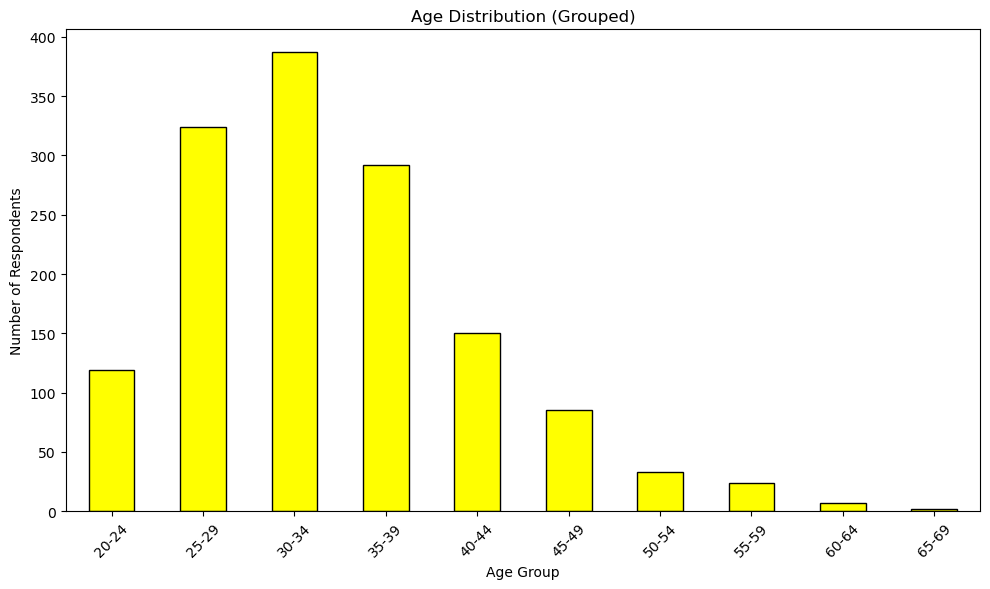

In [19]:
import numpy as np

#Keep raw data
df['age_raw'] = df['What is your age?'].copy()

#Convert to numeric
df['age_clean'] = pd.to_numeric(df['What is your age?'], errors='coerce')

#Remove bad values
df.loc[df['age_clean'] == 323, 'age_clean'] = 32  #Typo
df.loc[df['age_clean'] < 18, 'age_clean'] = np.nan  #Invalid - Too young
df.loc[df['age_clean'] > 70, 'age_clean'] = np.nan  #Invalid - Too old

#Drop missing ages 
df = df.dropna(subset=['age_clean'])

#Bin to 5-year intervals
bins = list(range(20, 71, 5))  
labels = [f"{i}-{i+4}" for i in bins[:-1]]  
df['age_group'] = pd.cut(df['age_clean'], bins=bins, labels=labels, right=False)

#Plot
import matplotlib.pyplot as plt

age_counts = df['age_group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Age Distribution (Grouped)')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('age_distribution.png', dpi=300)
plt.show()

In [20]:
#Keep raw data
df['age_raw'] = df['What is your age?'].copy()

#Convert to numeric and errors to NaN
df['age_clean'] = pd.to_numeric(df['What is your age?'], errors='coerce')

#Fix typo
df.loc[df['age_clean'] == 323, 'age_clean'] = 32

#Remove implausible ages
df.loc[(df['age_clean'] < 18) | (df['age_clean'] > 70), 'age_clean'] = np.nan

#Drop rows with no valid age
df = df.dropna(subset=['age_clean'])

#Bin to 5-year groups
bins = list(range(20, 76, 5))  
labels = [f"{i}-{i+4}" for i in bins[:-1]]
df['age_group'] = pd.cut(df['age_clean'], bins=bins, labels=labels, right=False)

#Count group
age_group_counts = df['age_group'].value_counts().sort_index()

#Display cloumn
age_group_df = age_group_counts.reset_index()
age_group_df.columns = ['Age Group', 'Count']

print(age_group_df)


   Age Group  Count
0      20-24    119
1      25-29    324
2      30-34    387
3      35-39    292
4      40-44    150
5      45-49     85
6      50-54     33
7      55-59     24
8      60-64      7
9      65-69      2
10     70-74      1


In [21]:
#view answer for work position question
#display ALL rows
pd.set_option('display.max_rows', None)

work_possitions = df['Which of the following best describes your work position?'].value_counts()
print(work_possitions)

Which of the following best describes your work position?
Back-end Developer                                                                                                                            262
Front-end Developer                                                                                                                           124
Other                                                                                                                                         111
Supervisor/Team Lead                                                                                                                           67
Back-end Developer|Front-end Developer                                                                                                         61
DevOps/SysAdmin                                                                                                                                54
One-person shop                                                   

In [22]:
#Clean work position data

#Create a copy of data
df['position_raw'] = df['Which of the following best describes your work position?'].copy()

#Standardize 
df['position_clean'] = df['position_raw'].str.lower().str.strip()

#Define  12 categories
category_patterns = {
    'Software Developer': [
        r'back[\s\-]end',
        r'front[\s\-]end',
        r'full[\s\-]stack',
        r'back.*front',
        r'front.*back'
    ],
    'DevOps/Systems': [
        r'devops',
        r'sysadmin',
        r'cloud',
        r'infrastructure',
        r'system administrator'
    ],
    'Technical Leadership': [
        r'supervisor',
        r'team lead',
        r'engineering manager',
        r'tech lead',
        r'technical lead'
    ],
    'Executive Leadership': [
        r'executive',
        r'cto',
        r'vp',
        r'director',
        r'chief'
    ],
    'Design/UX': [
        r'designer',
        r'ux',
        r'ui',
        r'product designer',
        r'user experience'
    ],
    'Support/Operations': [
        r'support',
        r'operations',
        r'it ops',
        r'technical support',
        r'help desk'
    ],
    'Developer Advocacy': [
        r'evangelist',
        r'advocate',
        r'devrel',
        r'community',
        r'developer relations'
    ],
    'Entrepreneur/Sole Developer': [
        r'one[\s\-]person',
        r'freelance',
        r'independent',
        r'sole developer',
        r'self[\s\-]employed'
    ],
    'Sales/HR/Business': [
        r'sales',
        r'hr',
        r'human resources',
        r'business',
        r'recruiting'
    ],
    'Other Technical': [
        r'data scien',
        r'qa',
        r'quality',
        r'database',
        r'security'
    ],
    'Non-Technical': [
        r'marketing',
        r'administrative',
        r'finance',
        r'legal',
        r'other non[\s\-]tech'
    ]
}

#Initialize the category column
df['position_category'] = 'Multiple/Combined Roles'  

#Categorize function - individual roles
def categorize_single_position(position):
    if pd.isna(position):
        return np.nan
    
    position = str(position).lower()
    
    #Check each category
    for category, patterns in category_patterns.items():
        for pattern in patterns:
            if re.search(pattern, position):
                return category
                
    #Check non-technical keyords
    non_tech_keywords = ['other', 'none', 'not applicable']
    if any(keyword in position for keyword in non_tech_keywords):
        return 'Non-Technical'
        
    return 'Other'  # Fallback for unclassified single roles

#Function - combined roles
def handle_combined_positions(position):
    if pd.isna(position) or '|' not in str(position):
        return categorize_single_position(position)
    
    parts = [p.strip() for p in position.split('|')]
    categories = [categorize_single_position(p) for p in parts]
    
    if len(set(categories)) == 1:
        return categories[0]
    
    #Special cases    
    if ('Software Developer' in categories) and ('Technical Leadership' in categories):
        return 'Technical Leadership'
    if ('Software Developer' in categories) and ('DevOps/Systems' in categories):
        return 'DevOps/Systems'
    if ('Design/UX' in categories) and ('Software Developer' in categories):
        return 'Design/UX'
    return 'Multiple/Combined Roles'

#Categorization
df['position_category'] = df['position_clean'].apply(handle_combined_positions)

#Manual corrections
corrections = {
    r'back.*front.*devops': 'DevOps/Systems',
    r'front.*back.*devops': 'DevOps/Systems',
    r'devops.*back.*front': 'DevOps/Systems',
    r'lead.*devops': 'Technical Leadership',
    r'lead.*developer': 'Technical Leadership',
    r'manager.*developer': 'Technical Leadership'
}

for pattern, category in corrections.items():
    mask = df['position_clean'].str.contains(pattern, regex=True, na=False)
    df.loc[mask, 'position_category'] = category

#Final cleanup
df.loc[df['position_category'] == 'Other', 'position_category'] = 'Non-Technical'

print("Work category distribution:")
print(df['position_category'].value_counts(dropna=False))

Work category distribution:
position_category
Software Developer             487
Technical Leadership           237
DevOps/Systems                 191
Multiple/Combined Roles        155
Non-Technical                  111
Design/UX                       80
Entrepreneur/Sole Developer     50
Executive Leadership            46
Support/Operations              34
Developer Advocacy              28
Sales/HR/Business                9
Name: count, dtype: int64


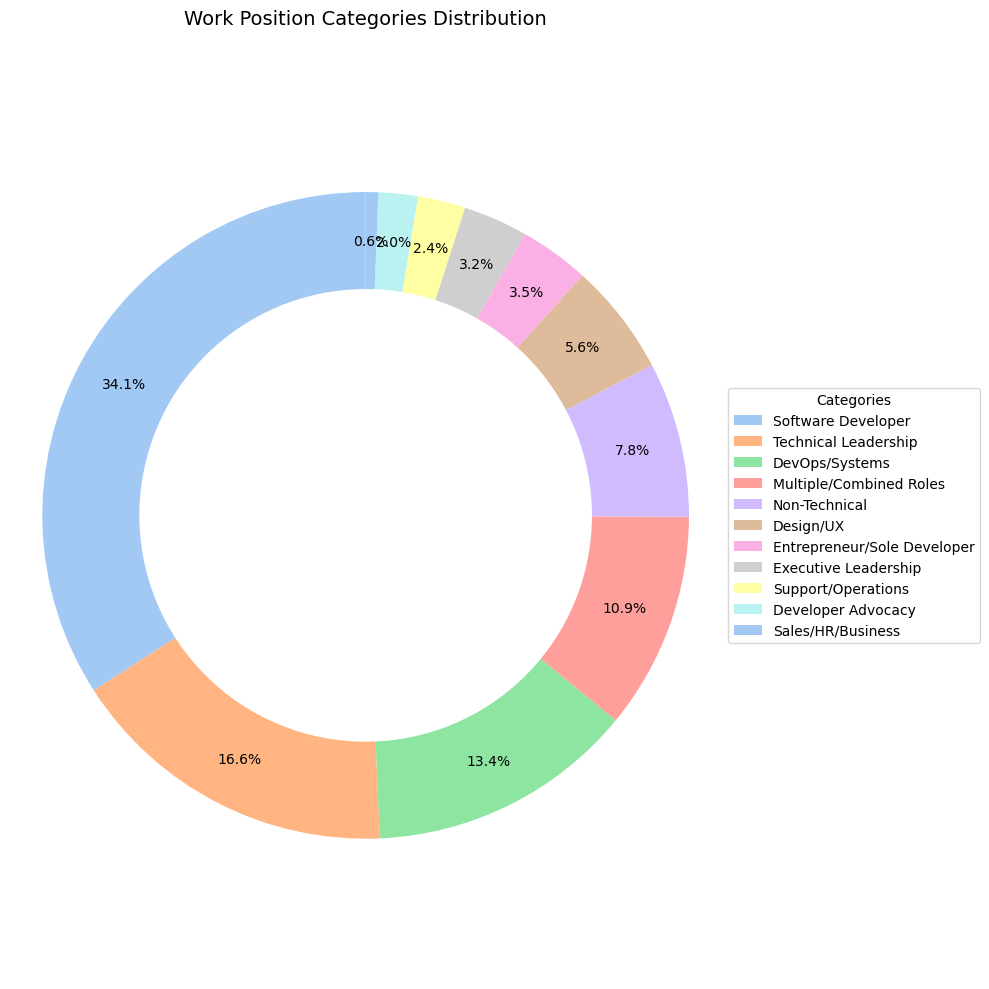

In [23]:
#Work category distribution graph
import seaborn as sns
#Prepare data
position_counts = df['position_category'].value_counts()
colors = sns.color_palette('pastel')[0:len(position_counts)]

#Create figure
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(position_counts, 
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors,
                                  pctdistance=0.85,
                                  wedgeprops=dict(width=0.4))

#Draw donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Ensures pie is drawn as circle
ax.axis('equal')  
plt.title('Work Position Categories Distribution', pad=20, fontsize=14)

#Create legend
plt.legend(wedges, position_counts.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.savefig('Work Position Categories Distribution.png', dpi=400)
plt.show()

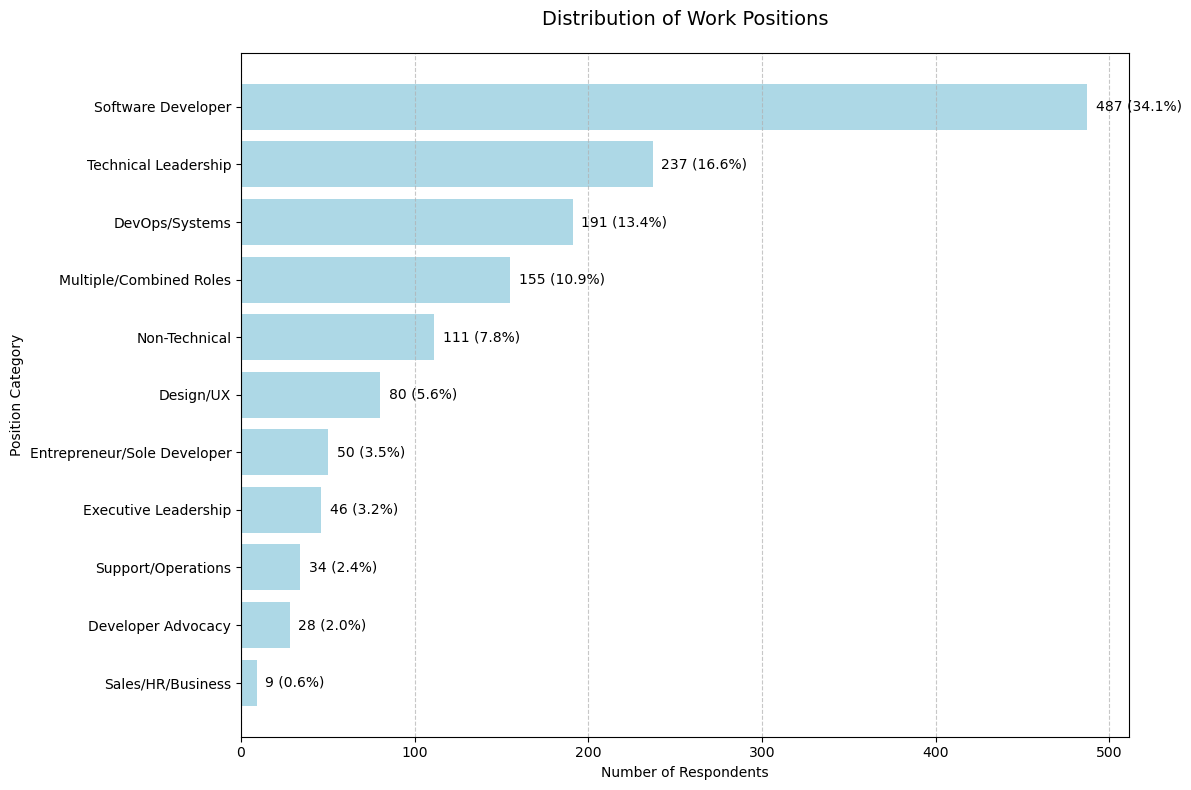

In [24]:
#Work position horizontal bar graph
import matplotlib.pyplot as plt
import seaborn as sns

#Get value counts and sort
position_counts = df['position_category'].value_counts().sort_values()

#Create figure
plt.figure(figsize=(12, 8))

#Create horizontal bar graph
bars = plt.barh(position_counts.index, position_counts.values, color='lightblue')

#Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{width} ({width/len(df)*100:.1f}%)',
             va='center')

#Formatting
plt.title('Distribution of Work Positions', pad=20, fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Position Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()




In [25]:
print(df.shape)    
df.head()            

(1428, 72)


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [26]:
selected_questions = [
    'Do you currently have a mental health disorder?',
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?',
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    'Do you believe your productivity is ever affected by a mental health issue?',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
    'Do you work remotely?'
]


cleaned_data = df[selected_questions].copy()

# Add cleaned versions
cleaned_columns = {
    'gender_clean': 'Gender',
    'position_category': 'Work Position',
    'age_group': 'Age'
    # Add any other cleaned columns you created
}

for clean_col, new_name in cleaned_columns.items():
    if clean_col in df.columns:
        cleaned_data[new_name] = df[clean_col]

#Save to new CSV
cleaned_data.to_csv('cleaned_mental_health_survey.csv', index=False)

#Verify
print("Saved columns:", cleaned_data.columns.tolist())
print("\nFirst 5 rows:")
display(cleaned_data.head())

Saved columns: ['Do you currently have a mental health disorder?', 'Have you been diagnosed with a mental health condition by a medical professional?', 'Have you ever sought treatment for a mental health issue from a mental health professional?', 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'Would you feel comfortable discussing a mental health disorder with your coworkers?', 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?', 'Do you feel that being identified as a person with a mental health issue would hurt your career?', 'Do you believe your productivity is ever affected by a mental health issue?', 'If yes, what percen

,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you work remotely?,Gender,Work Position,Age
0,No,Yes,0,Not eligible for coverage / N/A,No,I don't know,Maybe,Yes,Maybe,NaN,NaN,Sometimes,Male,Software Developer,35-39
1,Yes,Yes,1,No,Yes,Yes,Maybe,Yes,"No, I don't think it would",NaN,NaN,Never,Male,Software Developer,25-29
2,No,No,1,No,No,I don't know,Maybe,Maybe,Maybe,NaN,NaN,Always,Male,Software Developer,35-39
3,Yes,Yes,1,NaN,NaN,NaN,NaN,NaN,"Yes, I think it would",Yes,1-25%,Sometimes,Male,Technical Leadership,40-44
4,Yes,Yes,1,Yes,No,No,Maybe,No,"Yes, I think it would",NaN,NaN,Sometimes,Female,Technical Leadership,40-44


In [27]:
df['discussed_mental_health'] = df['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].replace({
    'Yes': 'Yes',
    'No': 'No',
    'I don\'t know': 'Unsure',
    np.nan: 'No Response'
})

In [28]:
print("Original value counts:")
print(df['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts(dropna=False))

Original value counts:
Does your employer provide mental health benefits as part of healthcare coverage?
Yes                                529
I don't know                       319
NaN                                286
No                                 211
Not eligible for coverage / N/A     83
Name: count, dtype: int64


In [29]:
df['mental_health_benefits'] = df['Does your employer provide mental health benefits as part of healthcare coverage?'].replace({
    'Yes': 'Yes',
    'No': 'No',
    'I don\'t know': 'Unsure',
    'Not eligible for coverage / N/A': 'Not eligible'})

In [30]:
print("\nCleaned value counts:")
print(df['mental_health_benefits'].value_counts(dropna=False))


Cleaned value counts:
mental_health_benefits
Yes             529
Unsure          319
NaN             286
No              211
Not eligible     83
Name: count, dtype: int64


In [31]:
#clean data for universal labeling and look

#Original value counts
print("Before cleaning:")
print(df['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts(dropna=False))

#Create cleaned column using pandas .replace()
df['mental_health_benefits'] = df['Does your employer provide mental health benefits as part of healthcare coverage?'].replace({
    'I don\'t know': 'Unsure',
    'Not eligible for coverage / N/A': 'Not eligible'
    
})

#Handle NaN values
df['mental_health_benefits'] = df['mental_health_benefits'].fillna('No response')

#Verify cleaning
print("\nAfter cleaning:")
print(df['mental_health_benefits'].value_counts(dropna=False))



Before cleaning:
Does your employer provide mental health benefits as part of healthcare coverage?
Yes                                529
I don't know                       319
NaN                                286
No                                 211
Not eligible for coverage / N/A     83
Name: count, dtype: int64

After cleaning:
mental_health_benefits
Yes             529
Unsure          319
No response     286
No              211
Not eligible     83
Name: count, dtype: int64


In [32]:
#clean data for universal labeling and look
print("Original value counts:")
print(df['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].value_counts(dropna=False))

#Create cleaned column
df['discussed_mental_health'] = df['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].replace({
    'Yes': 'Yes',
    'No': 'No',
    'I don\'t know': 'Unsure'
})

# Handle NaN values
df['discussed_mental_health'] = df['discussed_mental_health'].fillna('No response')

#Verify 
print("\nCleaned value counts:")
print(df['discussed_mental_health'].value_counts(dropna=False))

Original value counts:
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
No              811
NaN             286
Yes             228
I don't know    103
Name: count, dtype: int64

Cleaned value counts:
discussed_mental_health
No             811
No response    286
Yes            228
Unsure         103
Name: count, dtype: int64


In [33]:
#clean data for universal labeling and look
print("Original Responses:")
original_counts = df['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'].value_counts(dropna=False)
print(original_counts)

#Create cleaned column 
df['anonymity_protected'] = df['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'].replace({
    'Yes': 'Yes',
    'No': 'No',
    'I don\'t know': 'Unsure' 
})

#Handle missing NaN values
df['anonymity_protected'] = df['anonymity_protected'].fillna('No response')

# Step 4: Verify the transformation
print("\nCleaned Responses:")
cleaned_counts = df['anonymity_protected'].value_counts(dropna=False)
print(cleaned_counts)

Original Responses:
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
I don't know    740
Yes             318
NaN             286
No               84
Name: count, dtype: int64

Cleaned Responses:
anonymity_protected
Unsure         740
Yes            318
No response    286
No              84
Name: count, dtype: int64


In [34]:
#clean data for universal labeling and look
#Data count issue resolve
original_col = 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'

#Comprehensive cleaning
def clean_anonymity_response(response):
    if pd.isna(response):
        return 'No response'
    response = str(response).strip()
    if response.lower() in ['yes', 'y']:
        return 'Yes'
    elif response.lower() in ['no', 'n']:
        return 'No'
    elif 'don\'t know' in response.lower() or 'unsure' in response.lower():
        return 'Unsure'
    else:
        return 'Other response'  

df['anonymity_protected'] = df[original_col].apply(clean_anonymity_response)

#Verification
print("\nCleaned counts:")
print(df['anonymity_protected'].value_counts())

# Check for "Other response"
if 'Other response' in df['anonymity_protected'].values:
    print("\nUnusual responses found:")
    print(df[df['anonymity_protected'] == 'Other response'][original_col].unique())


Cleaned counts:
anonymity_protected
Unsure         740
Yes            318
No response    286
No              84
Name: count, dtype: int64


In [35]:
#clean data for universal labeling and look
print("Original Responses:")
original_counts = df['Would you feel comfortable discussing a mental health disorder with your coworkers?'].value_counts(dropna=False)
print(original_counts)

#Create cleaned column 
df['comfort_coworkers'] = df['Would you feel comfortable discussing a mental health disorder with your coworkers?'].replace({
    'Yes': 'Yes',
    'No': 'No',
    'Maybe': 'Unsure', 
    np.nan: 'No response'
})

#Verification
print("\nCleaned Responses:")
cleaned_counts = df['comfort_coworkers'].value_counts(dropna=False)
print(cleaned_counts)

#Data integrity check t oprevent count issue
assert len(df) == sum(cleaned_counts), "Count mismatch detected!"
print(f"\nData integrity verified (Total: {len(df)} == Sum: {sum(cleaned_counts)})")

#Check for any unexpected values
unexpected = df[~df['Would you feel comfortable discussing a mental health disorder with your coworkers?'].isin(['Yes', 'No', 'Maybe', np.nan])]
if not unexpected.empty:
    print("\nUnexpected values found:")
    print(unexpected['Would you feel comfortable discussing a mental health disorder with your coworkers?'].value_counts())
else:
    print("\nNo unexpected values found")

Original Responses:
Would you feel comfortable discussing a mental health disorder with your coworkers?
Maybe    478
No       391
NaN      286
Yes      273
Name: count, dtype: int64

Cleaned Responses:
comfort_coworkers
Unsure         478
No             391
No response    286
Yes            273
Name: count, dtype: int64

Data integrity verified (Total: 1428 == Sum: 1428)

No unexpected values found


In [36]:
display(cleaned_data.head())

,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you work remotely?,Gender,Work Position,Age
0,No,Yes,0,Not eligible for coverage / N/A,No,I don't know,Maybe,Yes,Maybe,NaN,NaN,Sometimes,Male,Software Developer,35-39
1,Yes,Yes,1,No,Yes,Yes,Maybe,Yes,"No, I don't think it would",NaN,NaN,Never,Male,Software Developer,25-29
2,No,No,1,No,No,I don't know,Maybe,Maybe,Maybe,NaN,NaN,Always,Male,Software Developer,35-39
3,Yes,Yes,1,NaN,NaN,NaN,NaN,NaN,"Yes, I think it would",Yes,1-25%,Sometimes,Male,Technical Leadership,40-44
4,Yes,Yes,1,Yes,No,No,Maybe,No,"Yes, I think it would",NaN,NaN,Sometimes,Female,Technical Leadership,40-44


In [37]:
selected_questions = [
    'Do you currently have a mental health disorder?',
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    'Do you believe your productivity is ever affected by a mental health issue?',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
    'Do you work remotely?'
]

cleaned_data = df[selected_questions].copy()

#Add cleaned versions
cleaned_columns = {
    'gender_clean': 'Gender',
    'position_category': 'Work Position',
    'age_group': 'Age',
    'mental_health_benefits' : 'Mental Health benefits',
    'discussed_mental_health' : 'Has your employer ever formally discussed mental health',
    'anonymity_protected' : 'Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?',
    'comfort_coworkers' : 'Would you feel comfortable discussing a mental health disorder with your coworkers?'
    
}

for clean_col, new_name in cleaned_columns.items():
    if clean_col in df.columns:
        cleaned_data[new_name] = df[clean_col]

#Save CSV file
cleaned_data.to_csv('cleaned_mental_health_survey.csv', index=False)

#Verify
print("Saved columns:", cleaned_data.columns.tolist())
print("\nFirst 5 rows:")
display(cleaned_data.head())

Saved columns: ['Do you currently have a mental health disorder?', 'Have you been diagnosed with a mental health condition by a medical professional?', 'Have you ever sought treatment for a mental health issue from a mental health professional?', 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?', 'Do you feel that being identified as a person with a mental health issue would hurt your career?', 'Do you believe your productivity is ever affected by a mental health issue?', 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?', 'Do you work remotely?', 'Gender', 'Work Position', 'Age', 'Mental Health benefits', 'Has your employer ever formally discussed mental health', 'Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?', 'Would you feel comfortable discussing a mental health disorder with 

,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you work remotely?,Gender,Work Position,Age,Mental Health benefits,Has your employer ever formally discussed mental health,Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?,Would you feel comfortable discussing a mental health disorder with your coworkers?
0,No,Yes,0,Yes,Maybe,NaN,NaN,Sometimes,Male,Software Developer,35-39,Not eligible,No,Unsure,Unsure
1,Yes,Yes,1,Yes,"No, I don't think it would",NaN,NaN,Never,Male,Software Developer,25-29,No,Yes,Yes,Unsure
2,No,No,1,Maybe,Maybe,NaN,NaN,Always,Male,Software Developer,35-39,No,No,Unsure,Unsure
3,Yes,Yes,1,NaN,"Yes, I think it would",Yes,1-25%,Sometimes,Male,Technical Leadership,40-44,No response,No response,No response,No response
4,Yes,Yes,1,No,"Yes, I think it would",NaN,NaN,Sometimes,Female,Technical Leadership,40-44,Yes,No,No,Unsure


In [38]:
df['Have you ever sought treatment for a mental health issue from a mental health professional?'] = df['Have you ever sought treatment for a mental health issue from a mental health professional?'].replace({1: 'Yes', 0: 'No'})
df['Have you ever sought treatment for a mental health issue from a mental health professional?'] = df['Have you ever sought treatment for a mental health issue from a mental health professional?'].astype(str).str.strip().str.capitalize()

In [39]:
selected_questions = [
    'Do you currently have a mental health disorder?',
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    'Do you work remotely?'
]


cleaned_data = df[selected_questions].copy()

# Add cleaned versions (if you created separate cleaned columns)
cleaned_columns = {
    'gender_clean': 'Gender',
    'position_category': 'Work Position',
    'age_group': 'Age',
    'mental_health_benefits' : 'Mental Health benefits',
    'discussed_mental_health' : 'Has your employer ever formally discussed mental health',
    'anonymity_protected' : 'Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?',
    'comfort_coworkers' : 'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'comfort_supervisor' : 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'productivity_impact' : 'Do you believe your productivity is ever affected by a mental health issue?',
    'worktime_affected_pct' : 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
    
}

for clean_col, new_name in cleaned_columns.items():
    if clean_col in df.columns:
        cleaned_data[new_name] = df[clean_col]

#Save to CSV
cleaned_data.to_csv('cleaned_mental_health_survey.csv', index=False)

# Verify
print("Saved columns:", cleaned_data.columns.tolist())
print("\nFirst 5 rows:")
display(cleaned_data.head())

Saved columns: ['Do you currently have a mental health disorder?', 'Have you been diagnosed with a mental health condition by a medical professional?', 'Have you ever sought treatment for a mental health issue from a mental health professional?', 'Do you feel that being identified as a person with a mental health issue would hurt your career?', 'Do you work remotely?', 'Gender', 'Work Position', 'Age', 'Mental Health benefits', 'Has your employer ever formally discussed mental health', 'Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?', 'Would you feel comfortable discussing a mental health disorder with your coworkers?']

First 5 rows:


,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you work remotely?,Gender,Work Position,Age,Mental Health benefits,Has your employer ever formally discussed mental health,Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?,Would you feel comfortable discussing a mental health disorder with your coworkers?
0,No,Yes,No,Maybe,Sometimes,Male,Software Developer,35-39,Not eligible,No,Unsure,Unsure
1,Yes,Yes,Yes,"No, I don't think it would",Never,Male,Software Developer,25-29,No,Yes,Yes,Unsure
2,No,No,Yes,Maybe,Always,Male,Software Developer,35-39,No,No,Unsure,Unsure
3,Yes,Yes,Yes,"Yes, I think it would",Sometimes,Male,Technical Leadership,40-44,No response,No response,No response,No response
4,Yes,Yes,Yes,"Yes, I think it would",Sometimes,Female,Technical Leadership,40-44,Yes,No,No,Unsure


In [40]:
#clean data for universal labeling and look
print("Original Responses:")
original_counts = df['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts(dropna=False)
print(original_counts)

#Create cleaned column 
df['comfort_supervisor'] = df['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].replace({
    'Yes': 'Yes',
    'No': 'No',
    'Maybe': 'Unsure',   
    np.nan: 'No response'
})

#Validate transformation
print("\nCleaned Responses:")
cleaned_counts = df['comfort_supervisor'].value_counts(dropna=False)
print(cleaned_counts)

#Verification
assert len(df) == sum(cleaned_counts), f"Data loss detected! Original: {len(df)}, Cleaned: {sum(cleaned_counts)}"
print("\nData integrity check passed. Counts match.")

#Check for hidden variations 
hidden_variations = df[
    df['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?']
    .str.strip().str.lower()
    .isin(['yes', 'no', 'maybe', np.nan]) == False
]
if not hidden_variations.empty:
    print("\nFound hidden response variations:")
    print(hidden_variations['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts())
else:
    print("\nNo hidden variations found")

Original Responses:
Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
Yes      424
Maybe    382
No       336
NaN      286
Name: count, dtype: int64

Cleaned Responses:
comfort_supervisor
Yes            424
Unsure         382
No             336
No response    286
Name: count, dtype: int64

Data integrity check passed. Counts match.

No hidden variations found


In [41]:
#clean data for universal labeling and look
print("Original Responses:")
original_counts = df['Do you believe your productivity is ever affected by a mental health issue?'].value_counts(dropna=False)
print(original_counts)

#Create cleaned column 
df['productivity_impact'] = df['Do you believe your productivity is ever affected by a mental health issue?'].replace({
    'Yes': 'Yes',
    'No': 'No',
    'Unsure': 'Unsure',
    'Not applicable to me': 'Not applicable',
    np.nan: 'No response'
})

#Validate the transformation
print("\nCleaned Responses:")
cleaned_counts = df['productivity_impact'].value_counts(dropna=False)
print(cleaned_counts)

#Verification
assert len(df) == sum(cleaned_counts), f"Data loss detected! Original: {len(df)}, Cleaned: {sum(cleaned_counts)}"
print("\nData integrity check passed. Counts match.")

#Check for any unexpected values
unexpected = df[~df['Do you believe your productivity is ever affected by a mental health issue?'].isin(
    ['Yes', 'No', 'Unsure', 'Not applicable to me', np.nan]
)]
if not unexpected.empty:
    print("\nUnexpected values found:")
    print(unexpected['Do you believe your productivity is ever affected by a mental health issue?'].value_counts())
else:
    print("\nNo unexpected values found")

Original Responses:
Do you believe your productivity is ever affected by a mental health issue?
NaN                     1142
Yes                      204
Unsure                    38
Not applicable to me      30
No                        14
Name: count, dtype: int64

Cleaned Responses:
productivity_impact
No response       1142
Yes                204
Unsure              38
Not applicable      30
No                  14
Name: count, dtype: int64

Data integrity check passed. Counts match.

No unexpected values found


In [42]:
#clean data for universal labeling and look
print("Original Responses:")
original_counts = df['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts(dropna=False)
print(original_counts)

#Create cleaned column 
def clean_percentage_affected(response):
    if pd.isna(response):
        return 'No response'
    
    response = str(response).strip()
    
    if response == 'NaN':
        return 'No response'
    elif response == '1-25%':
        return '1-25%'
    elif response == '26-50%':
        return '26-50%'
    elif response == '51-75%':
        return '51-75%'
    elif response == '76-100%':
        return '76-100%'
    else:
        return 'Invalid response'

df['worktime_affected_pct'] = df['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].apply(clean_percentage_affected)

#Validate
print("\nCleaned Responses:")
cleaned_counts = df['worktime_affected_pct'].value_counts(dropna=False)
print(cleaned_counts)

#Data verification
assert len(df) == sum(cleaned_counts), f"Data loss detected! Original: {len(df)}, Cleaned: {sum(cleaned_counts)}"
print("\nData integrity check passed. Counts match.")

#Unexpected values
unexpected = df[df['worktime_affected_pct'] == 'Invalid response']
if not unexpected.empty:
    print("\nUnexpected values found:")
    print(unexpected['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts())
else:
    print("\nNo unexpected values found")

Original Responses:
If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
NaN        1224
1-25%        92
26-50%       72
51-75%       26
76-100%      14
Name: count, dtype: int64

Cleaned Responses:
worktime_affected_pct
No response    1224
1-25%            92
26-50%           72
51-75%           26
76-100%          14
Name: count, dtype: int64

Data integrity check passed. Counts match.

No unexpected values found


In [43]:
#clean data for universal labeling and look
print("Original Responses:")
original_counts = df['Do you currently have a mental health disorder?'].value_counts(dropna=False)
print(original_counts)

#Create cleaned column
df['current_disorder'] = df['Do you currently have a mental health disorder?'].replace({
    'Yes': 'Yes',
    'No': 'No',
    'Maybe': 'Unsure',  # Consistent with previous "Unsure" labeling
    np.nan: 'No response'
})

#Verify transformation
print("\nCleaned Responses:")
cleaned_counts = df['current_disorder'].value_counts(dropna=False)
print(cleaned_counts)

#Data verification
assert len(df) == sum(cleaned_counts), "Count mismatch detected!"
print(f"\nData integrity verified (Total: {len(df)} == Sum: {sum(cleaned_counts)})")

#Unexpected values
unexpected = df[~df['Do you currently have a mental health disorder?'].isin(['Yes', 'No', 'Maybe', np.nan])]
if not unexpected.empty:
    print("\nUnexpected values found:")
    print(unexpected['Do you currently have a mental health disorder?'].value_counts())
else:
    print("\nNo unexpected values found")

Original Responses:
Do you currently have a mental health disorder?
Yes      574
No       528
Maybe    326
Name: count, dtype: int64

Cleaned Responses:
current_disorder
Yes       574
No        528
Unsure    326
Name: count, dtype: int64

Data integrity verified (Total: 1428 == Sum: 1428)

No unexpected values found


In [44]:
#Reorder - cleaned questions
import pandas as pd

# List of original survey questions to include
original_questions = [
    'Do you currently have a mental health disorder?',
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    'Do you work remotely?'
]

# Mapping of cleaned column names to descriptive labels
cleaned_column_map = {
    'gender_clean': 'Gender',
    'position_category': 'Work Position',
    'age_group': 'Age',
    'mental_health_benefits': 'Mental Health benefits',
    'discussed_mental_health': 'Has your employer ever formally discussed mental health',
    'anonymity_protected': 'Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?',
    'comfort_coworkers': 'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'comfort_supervisor': 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'productivity_impact': 'Do you believe your productivity is ever affected by a mental health issue?',
    'worktime_affected_pct': 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'
}

# Select original questions
cleaned_data = df[original_questions].copy()

# Add cleaned columns with renamed headers
for raw_col, new_label in cleaned_column_map.items():
    if raw_col in df.columns:
        cleaned_data[new_label] = df[raw_col]

#Reorder columns to your preferred final order
final_order = [
    'Do you currently have a mental health disorder?',
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    'Do you work remotely?',
    'Gender',
    'Work Position',
    'Age',
    'Mental Health benefits',
    'Has your employer ever formally discussed mental health',
    'Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'Do you believe your productivity is ever affected by a mental health issue?',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'
]

cleaned_data = cleaned_data[final_order]

# Save to CSV
cleaned_data.to_csv('cleaned_mental_health_survey.csv', index=False)

# Display results
print("Saved columns:", cleaned_data.columns.tolist())
print("\nFirst 5 rows:")
display(cleaned_data.head())

Saved columns: ['Do you currently have a mental health disorder?', 'Have you been diagnosed with a mental health condition by a medical professional?', 'Have you ever sought treatment for a mental health issue from a mental health professional?', 'Do you feel that being identified as a person with a mental health issue would hurt your career?', 'Do you work remotely?', 'Gender', 'Work Position', 'Age', 'Mental Health benefits', 'Has your employer ever formally discussed mental health', 'Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?', 'Would you feel comfortable discussing a mental health disorder with your coworkers?', 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?', 'Do you believe your productivity is ever affected by a mental health issue?', 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a menta

,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you work remotely?,Gender,Work Position,Age,Mental Health benefits,Has your employer ever formally discussed mental health,Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"
0,No,Yes,No,Maybe,Sometimes,Male,Software Developer,35-39,Not eligible,No,Unsure,Unsure,Yes,No response,No response
1,Yes,Yes,Yes,"No, I don't think it would",Never,Male,Software Developer,25-29,No,Yes,Yes,Unsure,Yes,No response,No response
2,No,No,Yes,Maybe,Always,Male,Software Developer,35-39,No,No,Unsure,Unsure,Unsure,No response,No response
3,Yes,Yes,Yes,"Yes, I think it would",Sometimes,Male,Technical Leadership,40-44,No response,No response,No response,No response,No response,Yes,1-25%
4,Yes,Yes,Yes,"Yes, I think it would",Sometimes,Female,Technical Leadership,40-44,Yes,No,No,Unsure,No,No response,No response


In [45]:
import pandas as pd

# Combine all questions — cleaned and original
question_columns = {
    # Raw/original questions
    'Have you been diagnosed with a mental health condition by a medical professional?': 'Diagnosed by professional',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'Sought treatment',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'Perceived career impact',
    'Do you work remotely?': 'Remote work',

    # Cleaned or engineered columns
    'gender_clean': 'Gender',
    'position_category': 'Work Position',
    'age_group': 'Age',
    'mental_health_benefits': 'Mental Health Benefits',
    'discussed_mental_health': 'Employer discussed mental health',
    'anonymity_protected': 'Anonymity protected for mental health treatment',
    'comfort_coworkers': 'Comfortable discussing with coworkers',
    'comfort_supervisor': 'Comfortable discussing with supervisor',
    'productivity_impact': 'Productivity affected by mental health',
    'worktime_affected_pct': 'Work time affected (%)',
    'current_disorder': 'Current mental health disorder (Cleaned)'
}

# Loop through all, print value counts
print("Summary of All Key Questions:\n")

for col, question_label in question_columns.items():
    if col in df.columns:
        print(f"\n{question_label}")
        print(df[col].value_counts(dropna=False))
    else:
        print(f"\n⚠️ Skipped (not found in DataFrame): {question_label}")

Summary of All Key Questions:


Diagnosed by professional
Have you been diagnosed with a mental health condition by a medical professional?
Yes    714
No     714
Name: count, dtype: int64

Sought treatment
Have you ever sought treatment for a mental health issue from a mental health professional?
Yes    836
No     592
Name: count, dtype: int64

Perceived career impact
Do you feel that being identified as a person with a mental health issue would hurt your career?
Maybe                         584
Yes, I think it would         563
No, I don't think it would    146
Yes, it has                   105
No, it has not                 30
Name: count, dtype: int64

Remote work
Do you work remotely?
Sometimes    753
Always       342
Never        333
Name: count, dtype: int64

Gender
gender_clean
Male            1053
Female           335
Other             18
Non-binary         8
Transgender        5
Genderqueer        5
Not Answered       3
Genderfluid        1
Name: count, dtype: int64

Work Pos

In [46]:
display(cleaned_data.head())

,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you work remotely?,Gender,Work Position,Age,Mental Health benefits,Has your employer ever formally discussed mental health,Is your anonymity protected if you choose to take advantage of mental health treatment resources provided by your employer?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"
0,No,Yes,No,Maybe,Sometimes,Male,Software Developer,35-39,Not eligible,No,Unsure,Unsure,Yes,No response,No response
1,Yes,Yes,Yes,"No, I don't think it would",Never,Male,Software Developer,25-29,No,Yes,Yes,Unsure,Yes,No response,No response
2,No,No,Yes,Maybe,Always,Male,Software Developer,35-39,No,No,Unsure,Unsure,Unsure,No response,No response
3,Yes,Yes,Yes,"Yes, I think it would",Sometimes,Male,Technical Leadership,40-44,No response,No response,No response,No response,No response,Yes,1-25%
4,Yes,Yes,Yes,"Yes, I think it would",Sometimes,Female,Technical Leadership,40-44,Yes,No,No,Unsure,No,No response,No response


In [47]:
#One hot encoding

import pandas as pd

#Columns to one-hot encode 
nominal_cols = [
    'Do you currently have a mental health disorder?',
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'Have you ever sought treatment for a mental health issue from a mental health professional?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    'Do you work remotely?',
    'gender_clean',
    'position_category',
    'mental_health_benefits',
    'discussed_mental_health',
    'anonymity_protected',
    'comfort_coworkers',
    'comfort_supervisor',
    'productivity_impact',
    'current_disorder'
]

#One-hot encode nominal columns
df_encoded = pd.get_dummies(
    df[nominal_cols], 
    prefix_sep=': ',  # Clear column names (e.g., "gender: Male")
    dummy_na=True     # Preserve missing values as a column
)

#Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

#Show the first 3 rows
print("Step 1: One-Hot Encoded Data (Binary 1/0)")
print(df_encoded.head(3))


Step 1: One-Hot Encoded Data (Binary 1/0)
   Do you currently have a mental health disorder?: Maybe  \
0                                                       0   
1                                                       0   
2                                                       0   

   Do you currently have a mental health disorder?: No  \
0                                                    1   
1                                                    0   
2                                                    1   

   Do you currently have a mental health disorder?: Yes  \
0                                                     0   
1                                                     1   
2                                                     0   

   Do you currently have a mental health disorder?: nan  \
0                                                     0   
1                                                     0   
2                                                     0   

   Hav

In [48]:
#Convert age_group strings to numerical midpoints
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    start, end = map(int, age_str.split('-'))
    return (start + end) / 2

df['age_midpoint'] = df['age_group'].apply(age_to_midpoint)
print(df['age_midpoint'].unique())



[37.0, 27.0, 42.0, 32.0, 52.0, ..., 22.0, 57.0, 62.0, 67.0, 72.0]
Length: 12
Categories (11, float64): [22.0 < 27.0 < 32.0 < 37.0 ... 57.0 < 62.0 < 67.0 < 72.0]


In [49]:
#Convert age_group strings to numerical midpoints
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan
    start, end = map(int, age_str.split('-'))
    return (start + end) / 2

df['age_midpoint'] = df['age_group'].apply(age_to_midpoint)
print(df['age_midpoint'].unique())



[37.0, 27.0, 42.0, 32.0, 52.0, ..., 22.0, 57.0, 62.0, 67.0, 72.0]
Length: 12
Categories (11, float64): [22.0 < 27.0 < 32.0 < 37.0 ... 57.0 < 62.0 < 67.0 < 72.0]


In [50]:
#Convert worktime_affected strings to numerical midpoints
def pct_to_midpoint(pct_str):
    if pd.isna(pct_str) or pct_str == 'No response':
        return np.nan
    
    try:
        #Remove % and ensure it is string
        clean_str = str(pct_str).replace('%', '')  #remove %
        if '-' in clean_str:
            start, end = map(int, clean_str.split('-'))
            return (start + end) / 2
        else:
            return np.nan 
    except:
        return np.nan  

df['worktime_midpoint'] = df['worktime_affected_pct'].apply(pct_to_midpoint)
print("Unique worktime midpoints:", df['worktime_midpoint'].unique())

Unique worktime midpoints: [nan 13. 88. 38. 63.]


In [51]:
#Add a binary for "No response"
df['worktime_no_response'] = df['worktime_affected_pct'].apply(lambda x: 1 if x == 'No response' else 0)

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['age_midpoint', 'worktime_midpoint']] = scaler.fit_transform(df[['age_midpoint', 'worktime_midpoint']])
print(df[['age_midpoint', 'worktime_midpoint']].head())

   age_midpoint  worktime_midpoint
0           0.3                NaN
1           0.1                NaN
2           0.3                NaN
3           0.4                0.0
4           0.4                NaN


In [57]:
df_final = pd.concat([df_encoded, df[['age_midpoint', 'worktime_midpoint']]], axis=1)
print(df_final.head())

   Do you currently have a mental health disorder?: Maybe  \
0                                                       0   
1                                                       0   
2                                                       0   
3                                                       0   
4                                                       0   

   Do you currently have a mental health disorder?: No  \
0                                                    1   
1                                                    0   
2                                                    1   
3                                                    0   
4                                                    0   

   Do you currently have a mental health disorder?: Yes  \
0                                                     0   
1                                                     1   
2                                                     0   
3                                               

In [59]:
#Check for NaNs
print("Any NaNs?", df_final.isna().sum().sum())

Any NaNs? 1228


In [61]:
df_final.fillna(0, inplace=True)
#Check for NaNs
print("Any NaNs?", df_final.isna().sum().sum())

Any NaNs? 0


In [63]:
#Check that all columns are numeric
print(df_final.dtypes.value_counts())

int32      77
float64     2
Name: count, dtype: int64


In [65]:
#Scale all features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final)


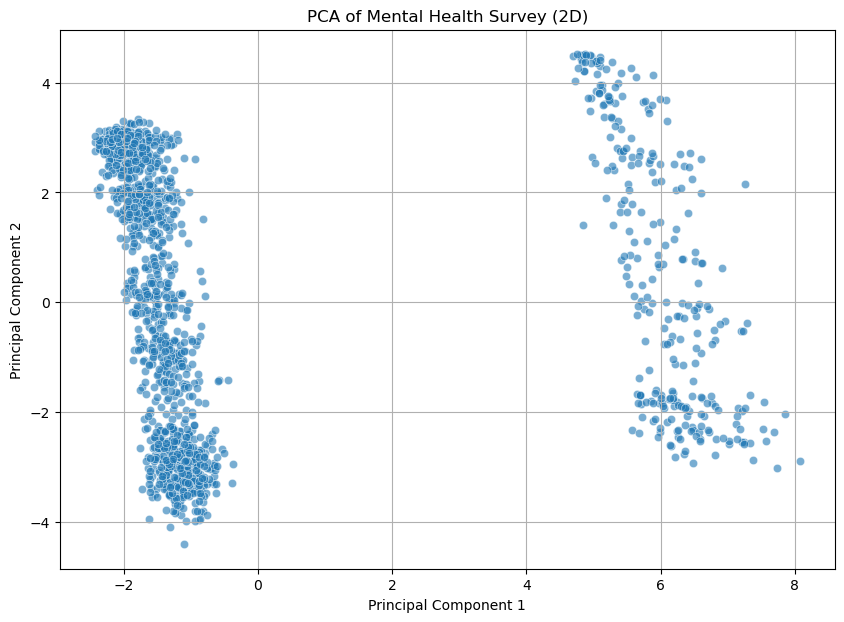

In [67]:
#Plot PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Mental Health Survey (2D)")
plt.grid(True)
plt.savefig('PCA of mental Health Survey.png', dpi=400)
plt.show()

In [69]:
#Scale data - 3 components
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

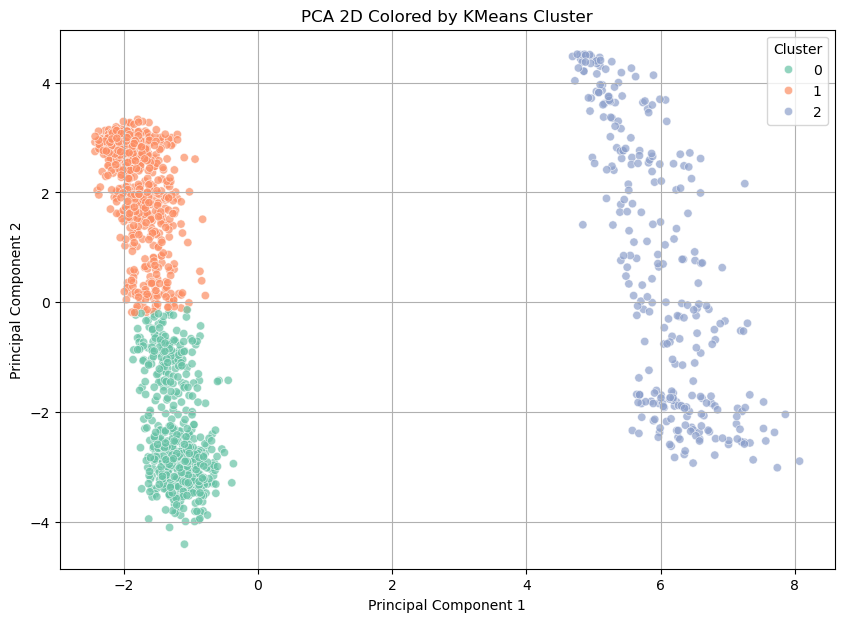

In [71]:
#Kmeans cluster
from sklearn.cluster import KMeans

#KMeans on 3D PCA result
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

#Cluster labels 
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = clusters

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title("PCA 2D Colored by KMeans Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.savefig('K-means n=3.png', dpi=400)
plt.show()


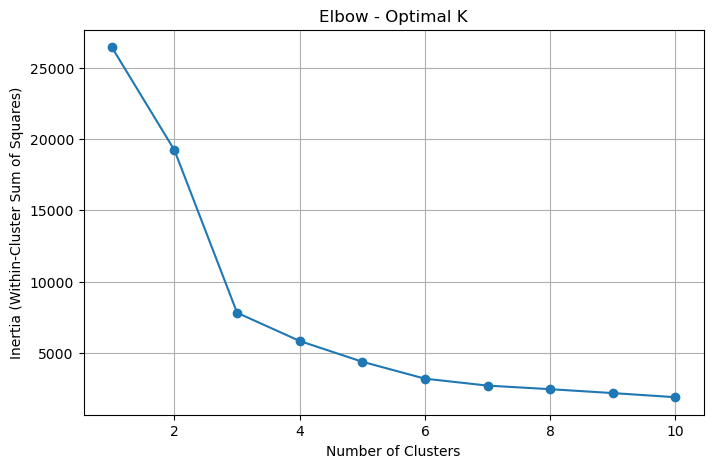

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different numbers of clusters (1 to 10)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.savefig('Elbow for Optimal K', dpi=400)
plt.show()


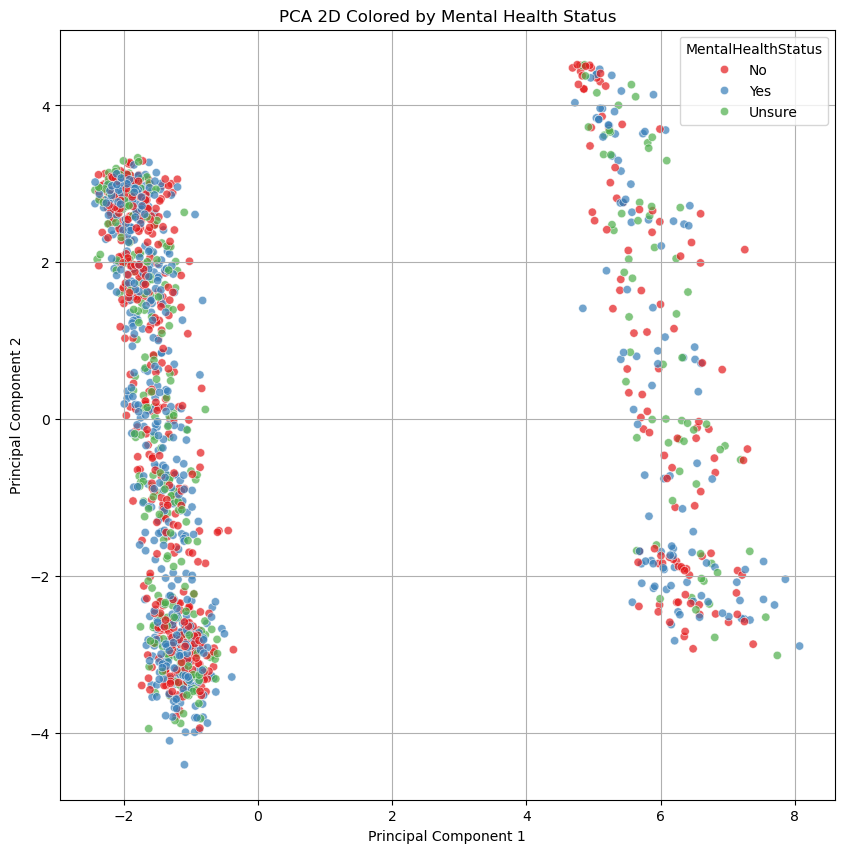

In [75]:
#PCA - Mental Health Status
pca_df['MentalHealthStatus'] = df['current_disorder'].fillna('Missing')

#2D PCA colored by category
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='MentalHealthStatus', palette='Set1', alpha=0.7)
plt.title("PCA 2D Colored by Mental Health Status")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.savefig('PCA Mental HEalth Status.png', dpi=400)
plt.show()


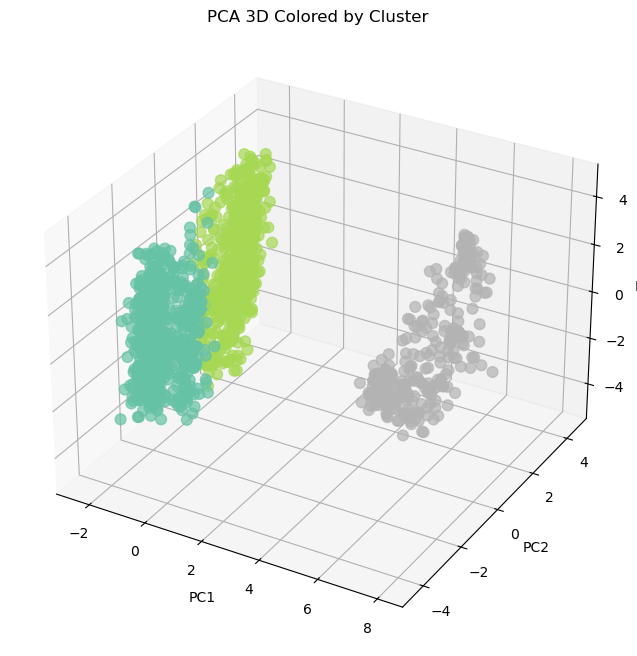

In [77]:
#3D PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
           c=pca_df['Cluster'], cmap='Set2', alpha=0.7, s=60)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Colored by Cluster')
plt.savefig('3D pca', dpi=400)
plt.show()


In [79]:
df_clustered = df_final.copy()
df_clustered['cluster'] = clusters

columns_to_summarize = [
    'age_midpoint',
    'worktime_midpoint',
    'current_disorder: Yes',
    'comfort_supervisor: Yes',
    'Do you work remotely?: Always'
]

cluster_summary = df_clustered.groupby('cluster')[columns_to_summarize].mean()
print("Cluster Summary:\n", cluster_summary)

cluster_sizes = df_clustered['cluster'].value_counts().sort_index()
cluster_summary['count'] = cluster_sizes

Cluster Summary:
          age_midpoint  worktime_midpoint  current_disorder: Yes  \
cluster                                                           
0            0.231004           0.000000               0.772401   
1            0.224315           0.000000               0.032534   
2            0.297203           0.193473               0.433566   

         comfort_supervisor: Yes  Do you work remotely?: Always  
cluster                                                          
0                       0.358423                       0.184588  
1                       0.383562                       0.193493  
2                       0.000000                       0.440559  


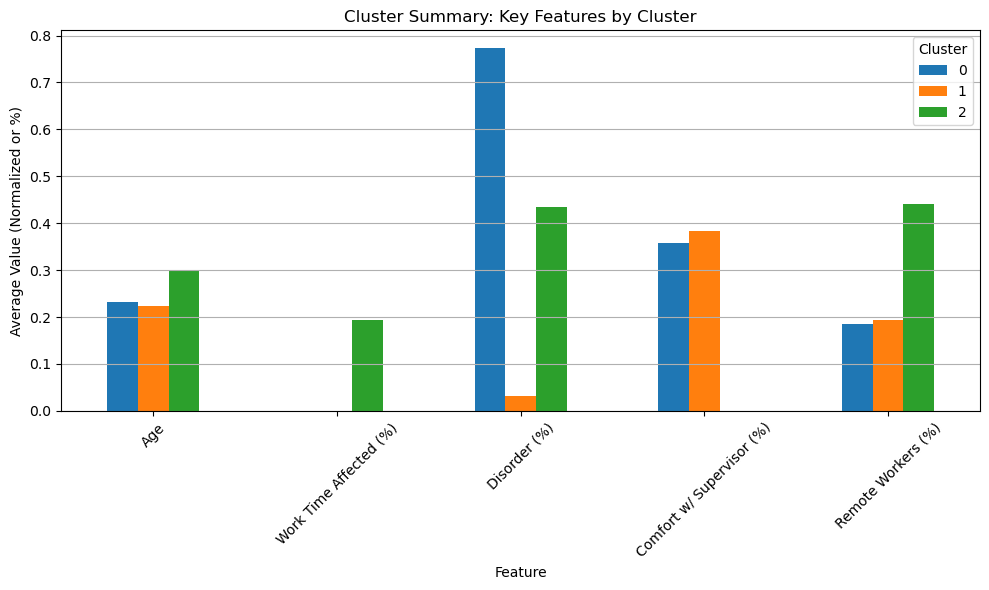

In [81]:
import matplotlib.pyplot as plt

# Use your cluster summary (replace with your actual DataFrame name)
features_to_plot = [
    'age_midpoint',
    'worktime_midpoint',
    'current_disorder: Yes',
    'comfort_supervisor: Yes',
    'Do you work remotely?: Always'
]

# Optional: rename for cleaner axis labels
clean_labels = {
    'age_midpoint': 'Age',
    'worktime_midpoint': 'Work Time Affected (%)',
    'current_disorder: Yes': 'Disorder (%)',
    'comfort_supervisor: Yes': 'Comfort w/ Supervisor (%)',
    'Do you work remotely?: Always': 'Remote Workers (%)'
}

# Rename columns
cluster_summary_renamed = cluster_summary[features_to_plot].rename(columns=clean_labels)

# Plot
cluster_summary_renamed.T.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Summary: Key Features by Cluster')
plt.ylabel('Average Value (Normalized or %)')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.grid(axis='y')
plt.savefig('Cluster Summary', dpi=400)
plt.show()
